In [ ]:
import os
os.chdir('/content/drive/MyDrive/DataScienceProject')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Packages.QC import QC
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_tr = pd.read_csv('Model ready data/x_train.csv')
x_te = pd.read_csv('Model ready data/x_test.csv')
y_tr = pd.read_csv('Model ready data/y_train.csv')
y_te = pd.read_csv('Model ready data/y_test.csv')

#Grid search

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xg = XGBRegressor(objective='reg:squarederror',random_state=10,n_jobs=-1)
xg.fit(x_tr,y_tr)
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
param_grid = {'base_score':[0.25,0.45,0.5,0.75,0.9],'booster':['gbtree','dart'],'gamma':range(0,4),'learning_rate':[0.07,0.1,0.15],
              'max_depth':range(1,5),'n_estimators':range(50,251,25),'subsample':[0.25,0.5,0.75,1]}
xg_grid = GridSearchCV(xg,param_grid,cv=5)
xg_grid.fit(x_tr,y_tr)
print(f'Best parameters from grid search: {xg_grid.best_params_}, based on best score: {xg_grid.best_score_}')

Best parameters from grid search: {'base_score': 0.9, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 175, 'subsample': 0.75}, based on best score: 0.9875181255362901


In [ ]:
yxg_tr_pred = xg_grid.predict(x_tr)
yxg_te_pred = xg_grid.predict(x_te)
print(f'Mean squared error for best params:\nTraining = {mean_squared_error(y_tr,yxg_tr_pred)*100:.5f}%\tTesting = {mean_squared_error(y_te,yxg_te_pred)*100:.5f}%')
print(f'R-2 score:\nTraining = {r2_score(y_tr,yxg_tr_pred)*100:.5f}%\tTesting = {r2_score(y_te,yxg_te_pred)*100:.5f}%')
print(f'Adjusted R-2 score:\nTraining = {(1 - (1-r2_score(y_tr,yxg_tr_pred))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1))*100:.5f}%\tTesting = {(1 - (1-r2_score(y_te,yxg_te_pred))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1))*100:.5f}%')

Mean squared error for best params:
Training = 0.15284%	Testing = 1.07420%
R-2 score:
Training = 99.79552%	Testing = 98.26538%
Adjusted R-2 score:
Training = 99.79131%	Testing = 98.11168%


#Plot

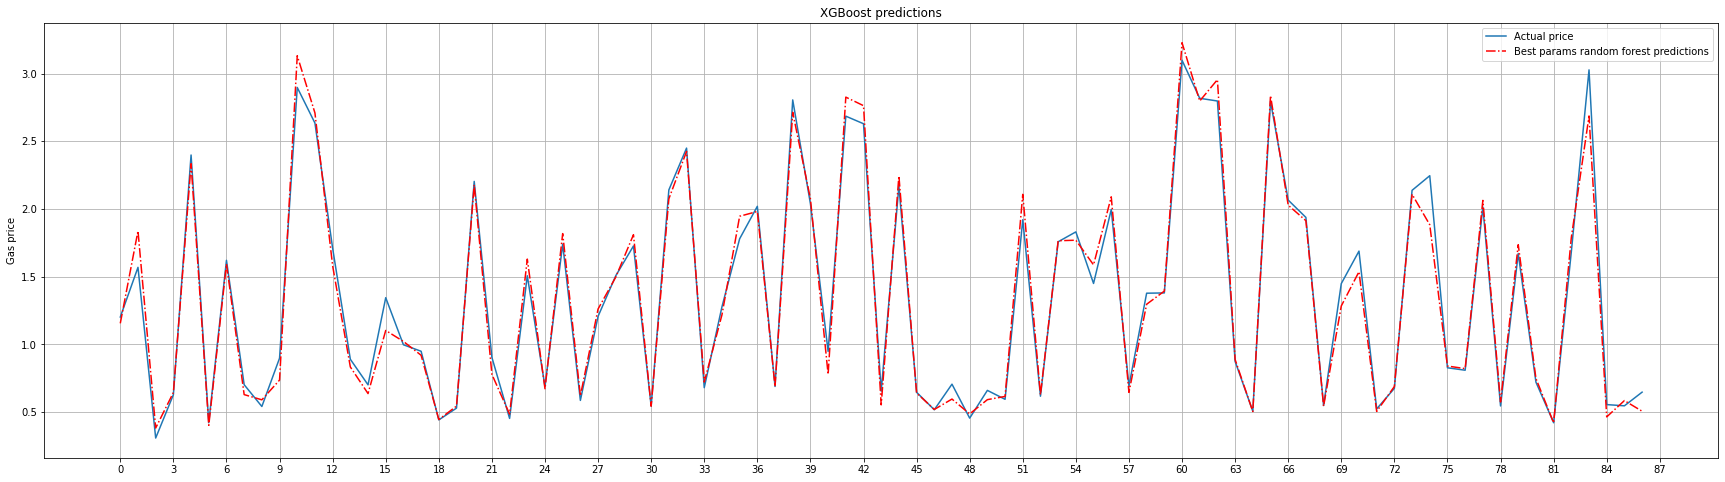

In [ ]:
ax = y_te.plot(figsize=(30,8))
plt.title('XGBoost predictions')
pd.DataFrame(yxg_te_pred).plot(ls='-.',color='r',ax=ax,grid=True)
plt.xticks(np.arange(0,len(y_te)+1,3))
plt.ylabel('Gas price')
plt.legend(['Actual price','Best params random forest predictions'])
plt.savefig('Results/Model outcomes/4.XGBoost predictions.png')
plt.show()